<center>Universidade Federal de Viçosa</center>
<center>Coordenadoria de Educação Aberta e a Distância</center>
<center>Inteligência Artificial e Computacional</center>
<center>ELT578 - Análise de Imagens e Visão Computacional</center>
<center>TURMA 2022/2</center>

**<center>AULA PRÁTICA 2: Técnicas de Realce</center>**

In [1]:
#Permissão para acessar o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


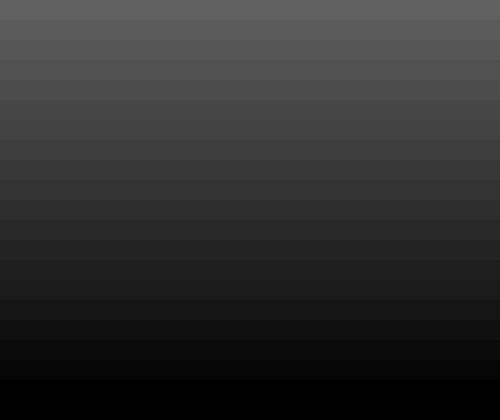

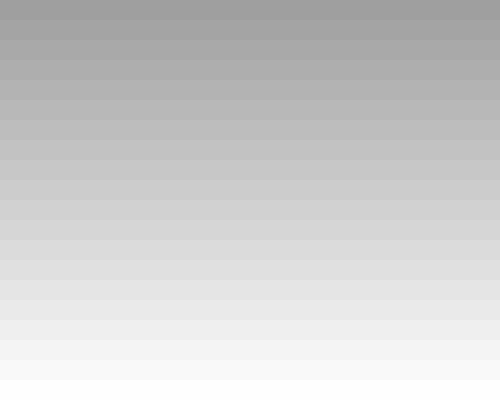

In [2]:
#Importando bibliotecas
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#Negativo da Imagem

Im=np.zeros([20,500],dtype = int) # Im20x500 de zeros
for i in range(0,100,5):
    ImT=np.add(np.zeros([20,500],dtype = int),1+i)
    Im=np.insert(Im,0,ImT,axis=0)
cv2_imshow(np.uint8(Im))
cv2.imwrite('/content/drive/MyDrive/ELT578_2022_2/SEMANA_2/PC.jpg',np.uint8(Im))

neg = cv2.subtract(255,Im)

cv2_imshow(neg)

In [3]:
# Lendo uma imagem do drive com cv2 e mostrando o seu negativo

# Carregar a imagem
image = cv2.imread("/content/drive/MyDrive/visao_computacional/p2/IMG_4975.jpeg")

# Exibir a imagem original
cv2_imshow(image)

# Converter a imagem para negativo
neg = cv2.subtract(255, image)

# Exibir o negativo da imagem
cv2_imshow(neg)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Transformação Logarítmica
Ie = cv2.imread('/content/drive/MyDrive/visao_computacional/p2/IMG_4975.jpeg',0)
print (Im.max())
c = 255/np.log(1+Im.max())
print (c.dtype)
print (c)

cv2_imshow(Ie)

Is = c*np.log(cv2.add(Ie,1))
print (Is.dtype)
print (Is.max())
print (Is.min())

Is=(Is-Is.min())/(Is.max()-Is.min())*255
print (Is.dtype)
print (Is.max())
print (Is.min())

Is = np.uint8(Is)
print (Is.dtype)
print (Is.max())
print (Is.min())

cv2_imshow(Is)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Transformação Exponencial
Ie = cv2.imread('/content/drive/MyDrive/visao_computacional/p2/IMG_4975.jpeg',0)
print (np.max(Ie))
print (np.min(Ie))

cv2_imshow(Ie)

b=1.02

Is = np.power(b,Ie)-1
print (Is.max())
print (Is.min())

Is = Is*255/Is.max()
print (Is.dtype)
print (Is.max())
print (Is.min())

Is = np.uint8(Is)
print (Is.dtype)
print (Is.max())
print (Is.min())

cv2_imshow(Is)

Output hidden; open in https://colab.research.google.com to view.

78.89543539252121
0
255
uint8


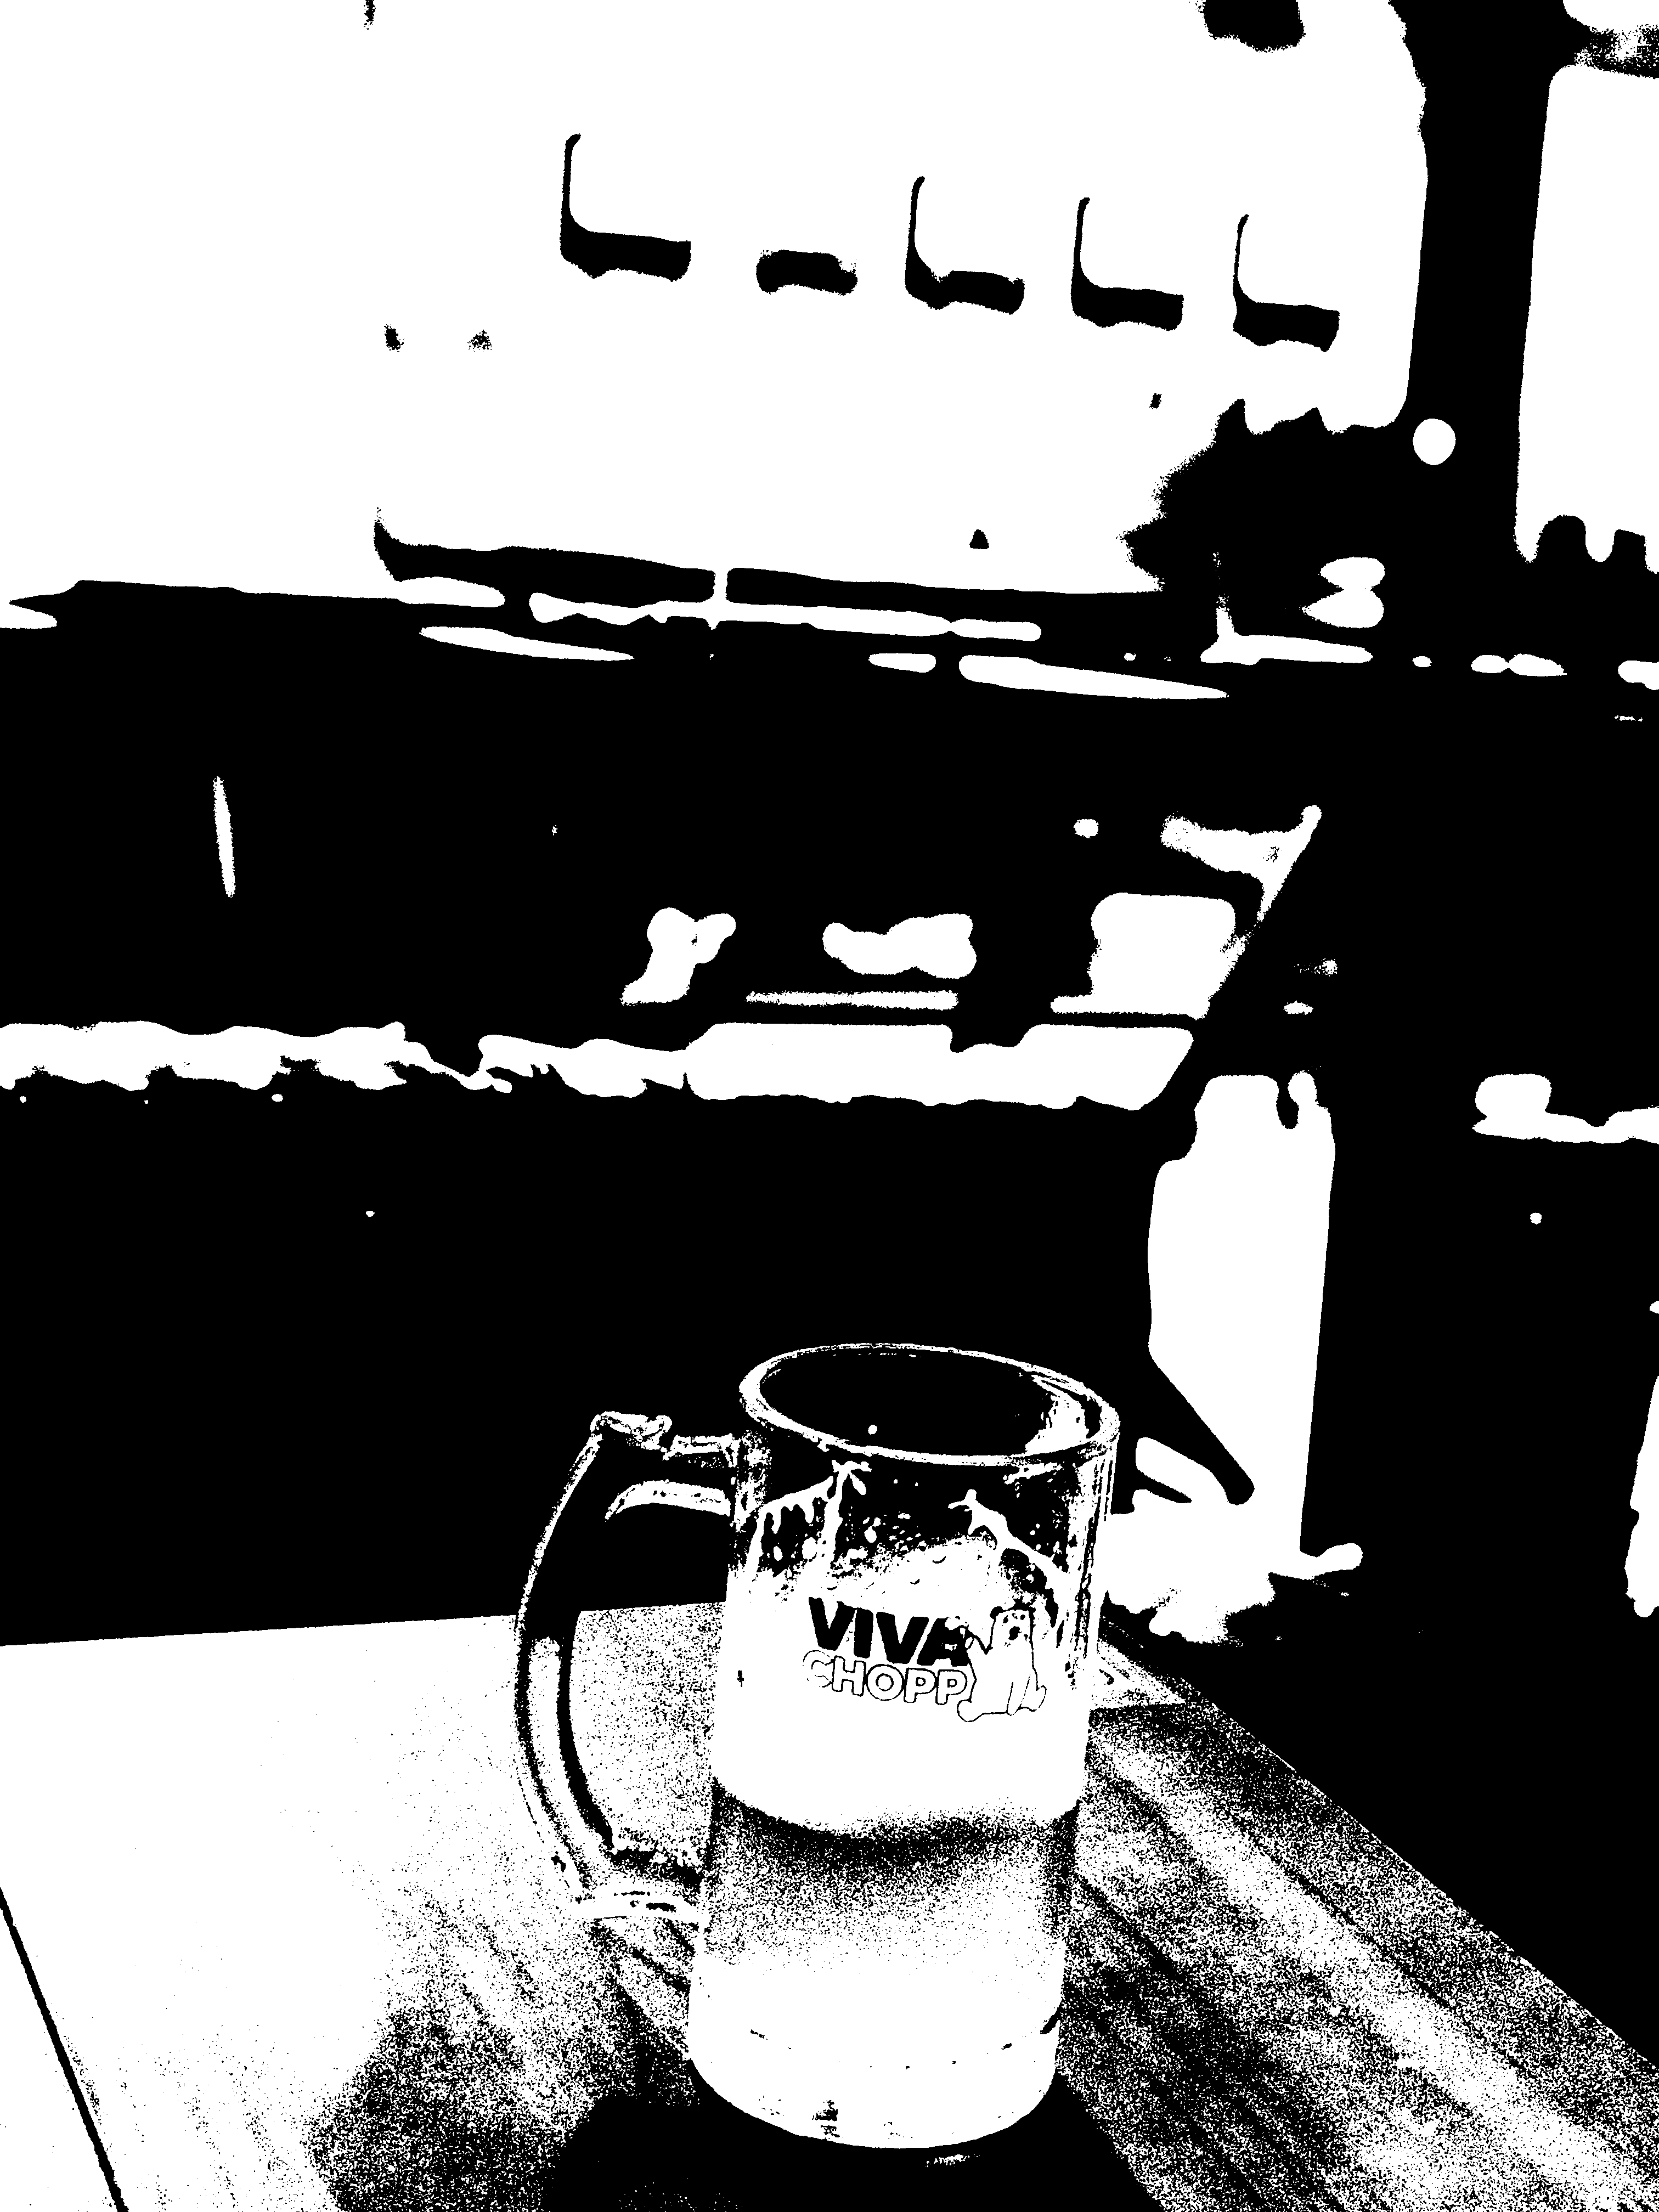

In [ ]:
#Limiarização

Im = cv2.imread('/content/drive/MyDrive/visao_computacional/p2/IMG_4975.jpeg',0)

k = np.mean(Im)

print (k)

Im_thr = Im.copy()
Im_thr[Im > k]=255
Im_thr[Im <= k]=0

print (Im_thr.min())
print (Im_thr.max())
print (Im_thr.dtype)

cv2_imshow(Im_thr)

In [ ]:
#EQUALIZAÇÃO - Processamento preto e branco

from matplotlib import pyplot as plt

Im = cv2.imread('/content/drive/MyDrive/visao_computacional/p2/IMG_4975.jpeg',0)
cv2_imshow(Im)

Im_eq=cv2.equalizeHist(Im) #Equalização - melhora o contraste

resul=np.hstack((Im,Im_eq))

cv2_imshow(resul)

cv2.imwrite('Equalizacao.png',Im_eq)

plt.hist(Im.ravel(), 255,[0,256])
plt.show()

plt.hist(Im_eq.ravel(), 255,[0,256])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#EQUALIZAÇÃO - Processamento RGB

#Explicação
#OpenCV carrega imagens coloridas no espaço de cores BGR. Com este espaço de cores, não é possível equalizar o histograma sem afetar as informações de cores porque 
#todos os 3 canais contêm informações de cores. Portanto, você deve converter a imagem BGR em um espaço de cores como YCrCb. No espaço de cores YCrCb, o canal Y da imagem contém apenas 
#informações de intensidade, enquanto os canais Cr e Cb contêm todas as informações de cores da imagem. Portanto, apenas o canal Y deve ser processado para obter uma imagem equalizada do histograma 
#sem alterar nenhuma informação de cor. Após o processamento, a imagem YCrCb deve ser convertida para o espaço de cores BGR antes de chamar a função imshow ().

from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/visao_computacional/p2/IMG_4975.jpeg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) #YUV

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2_imshow(img)
cv2_imshow(img_output)
cv2.imwrite('/content/drive/MyDrive/visao_computacional/p2/IMG_4975_equalizacao.jpeg', img_output, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

color = ('b','g','r')

for i,col in enumerate(color):
    histr1 = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr1,color = col)
    plt.xlim([0,256])
plt.show()


for i,col in enumerate(color):
    histr2 = cv2.calcHist([img_output],[i],None,[256],[0,256])
    plt.plot(histr2,color = col)
    plt.xlim([0,256])
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#CLAHE (Contrast Limited Adaptive Histogram Equalization)
#Parameters :
#When applying CLAHE, there are two parameters to be remembered:
#clipLimit – This parameter sets the threshold for contrast limiting. The default value is 40. 
#tileGridSize – This sets the number of tiles in the row and column. By default this is 8×8. It is used while the image is divided into tiles for applying CLAHE.

#Realizar a equalização do histograma da imagem utilizando a função CLAHE - Contrast Limited Adaptive Histogram Equalization